# Football Prediction Model

## 1. Defining the Question

### a) Specifying the Question

### b) Defining the Metric for Success

### c) Understanding the context

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [61]:
# Import the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Let's read the fifa ranking data

fifa_ranking = pd.read_csv('fifa_ranking.csv')

results = pd.read_csv('results.csv')

## 3. Checking the Data

In [46]:
# Fifa ranking data top data

fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [47]:
# Results data top data

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## 4. External Data Source Validation

## 5. Tidying the Dataset

#### a). Checking for Null Values

In [48]:
# Fifa ranking data

total = fifa_ranking.isnull().sum().sort_values(ascending=False)
percentage = (fifa_ranking.isnull().sum()/fifa_ranking.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
rank,0,0.0
country_full,0,0.0
country_abrv,0,0.0
total_points,0,0.0
previous_points,0,0.0
rank_change,0,0.0
cur_year_avg,0,0.0
cur_year_avg_weighted,0,0.0
last_year_avg,0,0.0
last_year_avg_weighted,0,0.0


In [49]:
# Result data

total = results.isnull().sum().sort_values(ascending=False)
percentage = (results.isnull().sum()/results.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
date,0,0.0
home_team,0,0.0
away_team,0,0.0
home_score,0,0.0
away_score,0,0.0
tournament,0,0.0
city,0,0.0
country,0,0.0
neutral,0,0.0


There are no null values in the two datasets

#### b). Checking for Duplicates

In [50]:
# Fifa ranking data

fifa_ranking.duplicated().sum()

37

In [51]:
# Dropping the duplicated data

fifa_ranking.drop_duplicates(inplace=True,keep='first')

In [52]:
# Result data

results.duplicated().sum()

0

#### c). Checking the Datatypes

In [53]:
# Fifa ranking data

fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57756 non-null  int64  
 1   country_full             57756 non-null  object 
 2   country_abrv             57756 non-null  object 
 3   total_points             57756 non-null  float64
 4   previous_points          57756 non-null  int64  
 5   rank_change              57756 non-null  int64  
 6   cur_year_avg             57756 non-null  float64
 7   cur_year_avg_weighted    57756 non-null  float64
 8   last_year_avg            57756 non-null  float64
 9   last_year_avg_weighted   57756 non-null  float64
 10  two_year_ago_avg         57756 non-null  float64
 11  two_year_ago_weighted    57756 non-null  float64
 12  three_year_ago_avg       57756 non-null  float64
 13  three_year_ago_weighted  57756 non-null  float64
 14  confederation         

In [54]:
# Result data

results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


## 6. Exploratory Analysis

### a) Univariate

In [55]:
# Checking for the Categorial Data
# Country

pd.crosstab(index=fifa_ranking['country_full'], columns='count')

col_0,count
country_full,
Afghanistan,184
Albania,286
Algeria,286
American Samoa,234
Andorra,253
...,...
Yemen,286
Yugoslavia,101
Zaire,66


### b). Bivariate

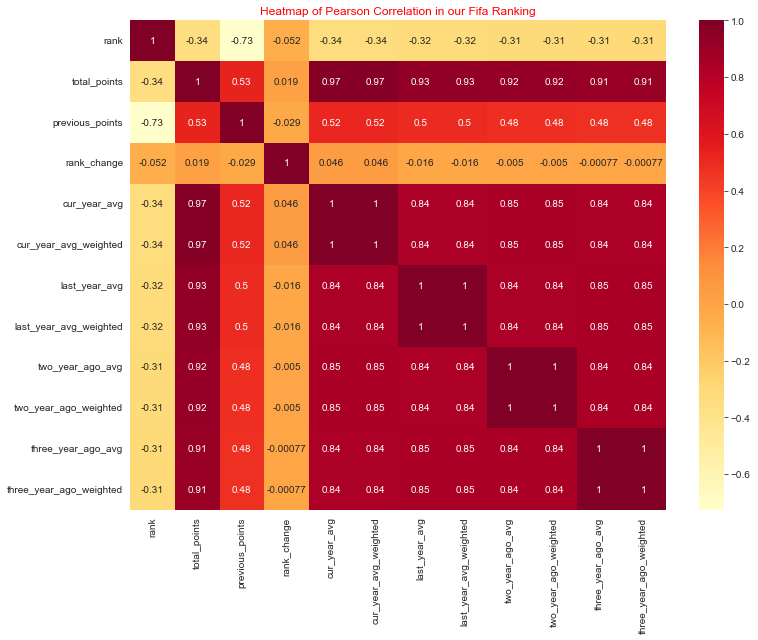

In [65]:
# Checking the Pearson's correlation
# Fifa ranking data

sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(fifa_ranking.corr(),annot=True,cmap='YlOrRd')
plt.title('Heatmap of Pearson Correlation in our Fifa Ranking', color='red')
plt.show()

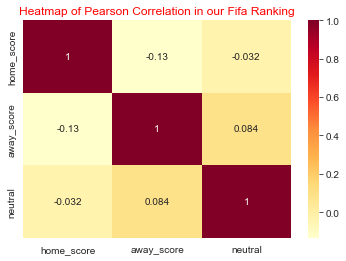

In [67]:
# Checking the Pearson's correlation
# Result data

sns.set_style("whitegrid")

sns.heatmap(results.corr(),annot=True,cmap='YlOrRd')
plt.title('Heatmap of Pearson Correlation in our Fifa Ranking', color='red')
plt.show()

### c). Polynomial Regression

**Analysis of the data**

In [75]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


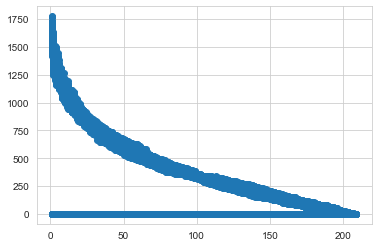

In [74]:
# Rank of Home Team

plt.scatter(x=fifa_ranking['rank'], y=fifa_ranking['total_points'])

## 7. Implementing the Solution

## 8. Challenging the solution

## 9. Follow up questions

### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?